## Example 1: Analysis of `Boston Housing Data`

Description of variables in Boston Housing dataset:

    CRIM: Crime rate
    ZN: Percentage of residential land zoned for lots over 25,000 ft 2
    INDUS: Percentage of land occupied by nonretail business
    CHAS: Does tract bound Charles River (= 1 if tract bounds river, = 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Percentage of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per `$10,000`
    PTRATIO: Pupil-to-teacher ratio by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in `$1000s`    
    CAT.MEDV Is median value of owner-occupied homes in tract above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0)
    
Importing the libraries

In [1]:
from pandas.plotting import scatter_matrix

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
housing_df = pd.read_csv("../datasets/BostonHousing.csv")

# Rename CAT.MEDV column for easier data handling
housing_df = housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


We consider three possible tasks:

1. A supervised predictive task, where the outcome variable of interest is the median value of a home in the tract (MEDV).
2. A supervised classification task, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whetherthe home value is above or below \\$30,000.
3. An unsupervised task, where the goal is to cluster census tracts.

## Example 2: `Ridership on Amtrak Trains`

Amtrak, a US railway company, routinely collects data on ridership. Here, we focus on forecasting future ridership using the series of monthly ridership between January 1991 and March 2004.

In [3]:
## Load the Amtrack data and convert them to be suitable for time series analysis
amtrack_df = pd.read_csv("../datasets/Amtrak.csv", squeeze=True)
amtrack_df["Date"] = pd.to_datetime(amtrack_df.Month, format="%d/%m/%Y")
ridership_ts = pd.Series(amtrack_df.Ridership.values, index=amtrack_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

## Basic Charts: Bar Charts, Line Charts and Scatter Plots

Pandas version:

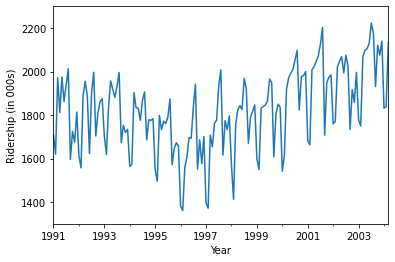

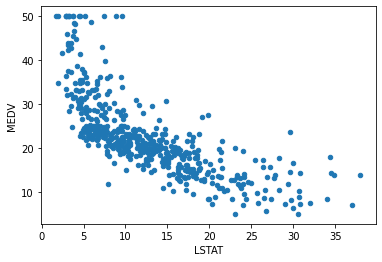

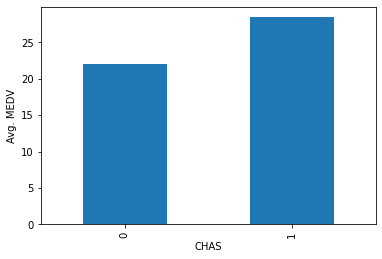

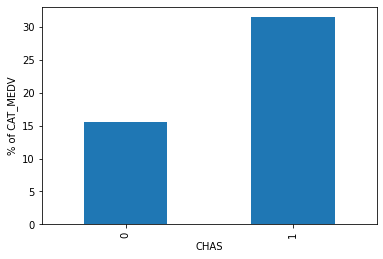

In [4]:
# line graph
ridership_ts.plot(ylim=[1300,  2300], legend=False)
# set x-axis and y-axis labels
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# scatter plot with axes names
housing_df.plot.scatter(x="LSTAT", y="MEDV", legend=False)
plt.show()

# barchart of CHAS vs. MEDV
# by the mean MEDV per CHAS = (0, 1)
housing_df.groupby("CHAS").mean().MEDV.plot(kind="bar")
plt.ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT_MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
data_for_plot.plot(kind="bar")
plt.ylabel("% of CAT_MEDV")
plt.show()

matplolib version

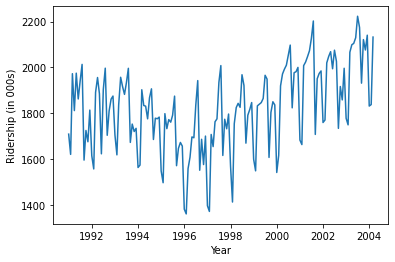

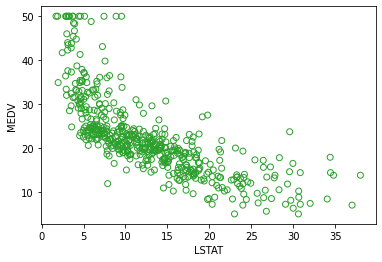

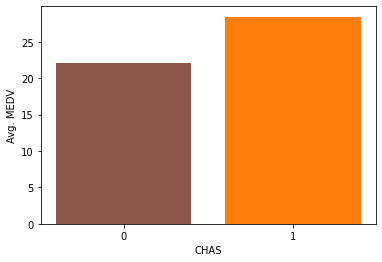

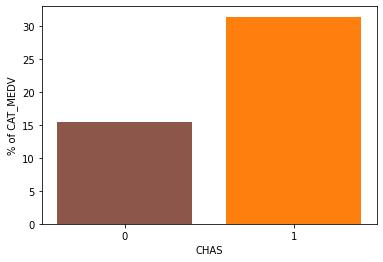

In [5]:
# line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color="C2", facecolor="None")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

# barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
data_for_plot = housing_df.groupby("CHAS").mean().MEDV
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT.MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("% of CAT_MEDV")
plt.show()

## Distribution Plots: Boxplots and Histograms

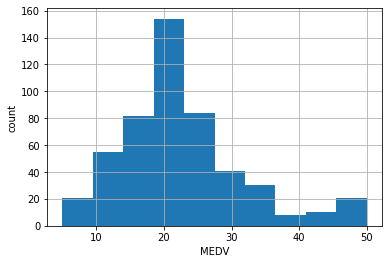

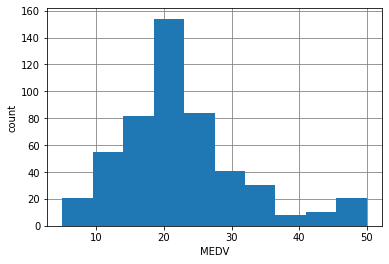

In [6]:
# histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

# alternative plot with maplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
# show the grid lines behing the histogram
ax.set_axisbelow(True)
ax.grid(which="major", color="grey", linestyle="-")
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

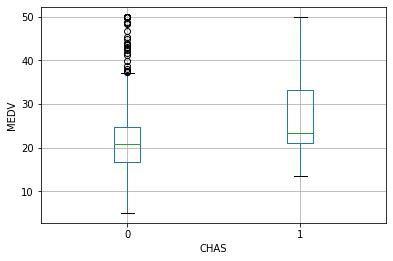

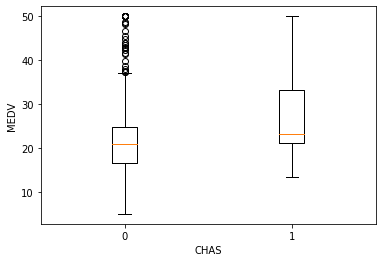

In [7]:
# boxplot of MEDV for different values of CHAS (0, 1)
ax = housing_df.boxplot(column="MEDV", by="CHAS")
ax.set_ylabel("MEDV")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

# alternative plot with matplotlib
data_for_plot = [list(housing_df[housing_df.CHAS == 0].MEDV),
                 list(housing_df[housing_df.CHAS == 1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(data_for_plot)
ax.set_xticks([1, 2])
ax.set_xticklabels([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("MEDV")
plt.show()

Using boxplots to evaluate the potential of numerical predictors (these are the ones that discriminate more the categorical value - e.g. PTRATIO and INDUS)

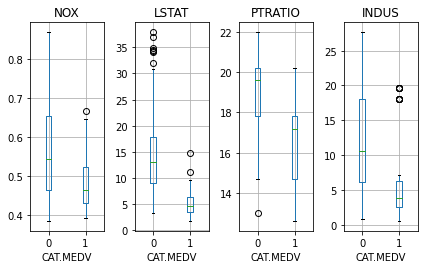

In [8]:
# side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column="NOX", by="CAT_MEDV", ax=axes[0])
housing_df.boxplot(column="LSTAT", by="CAT_MEDV", ax=axes[1])
housing_df.boxplot(column="PTRATIO", by="CAT_MEDV", ax=axes[2])
housing_df.boxplot(column="INDUS", by="CAT_MEDV", ax=axes[3])

for ax in axes:
    ax.set_xlabel("CAT.MEDV")

# suppress the overall title
plt.suptitle("")
# increase the separation between the plots
plt.tight_layout()

# Heatmaps: visualizing correlations and missing values

A heatmap is a graphical display of numerical data where color is used to denote values.

- Heatmap of correlation:

<AxesSubplot:>

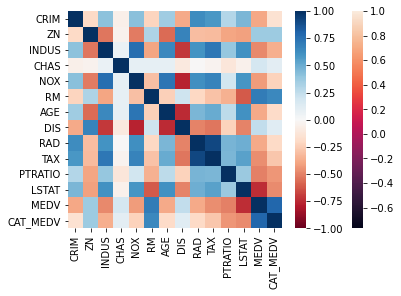

In [9]:
# simple heatmap of correlations (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            vmin=-1, vmax=1, cmap="RdBu")

<AxesSubplot:>

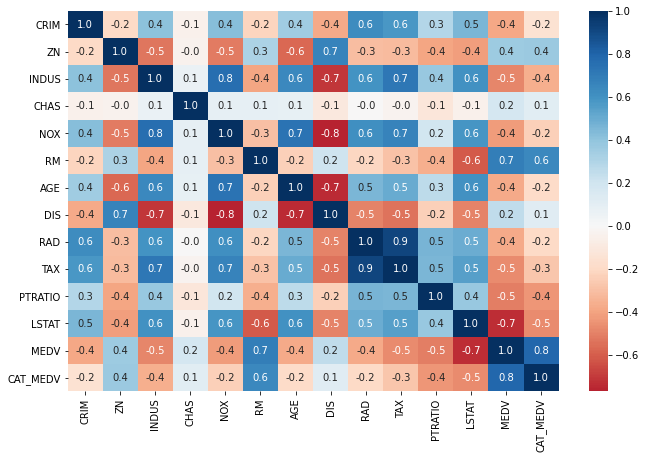

In [10]:
# include information about values
# (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

- Heatmap of missing values:

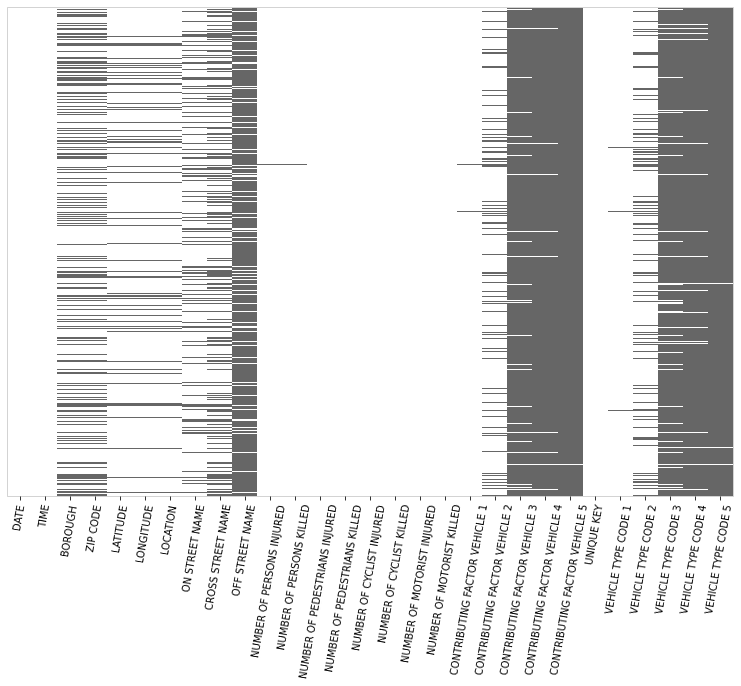

In [11]:
df = pd.read_csv("../datasets/NYPD_Motor_Vehicle_Collisions_1000.csv").sort_values(["DATE"])

# given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NAN
na_info = np.zeros(df.shape)
na_info[df.isna().values] = 1
na_info = pd.DataFrame(na_info, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(na_info, vmin=0, vmax=1, cmap=["white", "#666666"],
                 cbar=False, ax=ax)
ax.set_yticks([])

# draw frame around figure
rect = plt.Rectangle((0, 0), na_info.shape[1], na_info.shape[0],
                     linewidth=1, edgecolor="lightgrey", facecolor="none")
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)
plt.show()

## Multidimensional visualization

Basic plots can convey richer information with features such as color, size, and multiple panels, and by enabling operations such as rescaling, aggregation, and interactivity. These additions allow looking at more than one or two variables at a time. The beauty of these additions is their effectiveness in displaying complex information in an easily understandable way.

## Adding Variables: Color, Size, Shape, Multiple Panels, and Animation

In order to include more variables in a plot, we must consider the type of variable to include. To represent additional categorical information, the best way is to use hue, shape, or multiple panels. For additional numerical information, we can use color intensity or size. Temporal information can be added via animation.

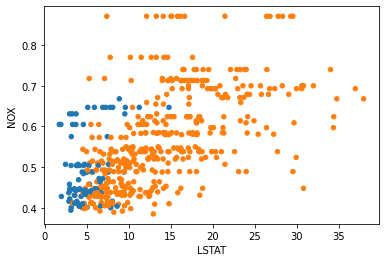

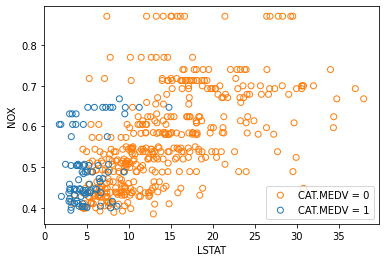

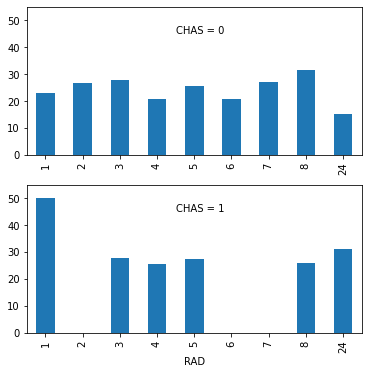

In [12]:
# color the points by the value of CAT.MEDV
housing_df.plot.scatter(x="LSTAT", y="NOX",
                        c=["C0" if c == 1 else "C1" for c in housing_df.CAT_MEDV])
plt.show()

# plot first the data points for CAT.MEDV of 0 and then of 1
# setting color to "none" gives open circles

_, ax = plt.subplots()
for cat_value, color in [(0, "C1"), (1, "C0")]:
    subset_df = housing_df[housing_df.CAT_MEDV == cat_value]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color="none",
               edgecolor=color)
ax.set_xlabel("LSTAT")
ax.set_ylabel("NOX")
ax.legend(["CAT.MEDV = 0", "CAT.MEDV = 1"])
plt.show()

# panel plots
# compute mean MEDV per RAD and CHAS
data_for_plot = housing_df.groupby(["CHAS", "RAD"]).mean()["MEDV"]

# we determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(data_for_plot[i].index):
        data_for_plot.loc[(i, t)] = 0

# reorder to rows, so that the index is sorted
data_for_plot = data_for_plot[sorted(data_for_plot.index)]

# determine a common range for the y axis
y_range = [0, max(data_for_plot) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6, 6)

data_for_plot[0].plot.bar(x="RAD", ax=axes[0], ylim=y_range)
data_for_plot[1].plot.bar(x="RAD", ax=axes[1], ylim=y_range)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
axes[0].set_xlabel("")
plt.show()

In the context of prediction, color-coding supports the exploration of the conditional relationship between the numerical outcome (on the y-axis) and a numerical predictor. Color-coded scatter plots then help assess the need for creating interaction terms (e.g., is the relationship between MEDV and LSTAT different for homes near vs.
away from the river?).

Creating multiple panels (also called “trellising”) is done by splitting the observations according to a categorical variable, and creating a separate plot (of the same type) for each category.

An example is shown above, where a bar chart of average MEDV by RAD is broken down into two panels by CHAS. We see that the average MEDV for different highway accessibility levels (RAD) behaves differently for homes near the river (lower panel) compared to homes away from the river (upper panel). This is especially salient for RAD = 1. We also see that there are no near-river homes in RAD levels 2, 6, and 7. Such information might lead us to create an interaction term between RAD and CHAS, and to consider condensing some of the bins in RAD. All these explorations are useful for prediction and classification.

- Scatter plot matrix

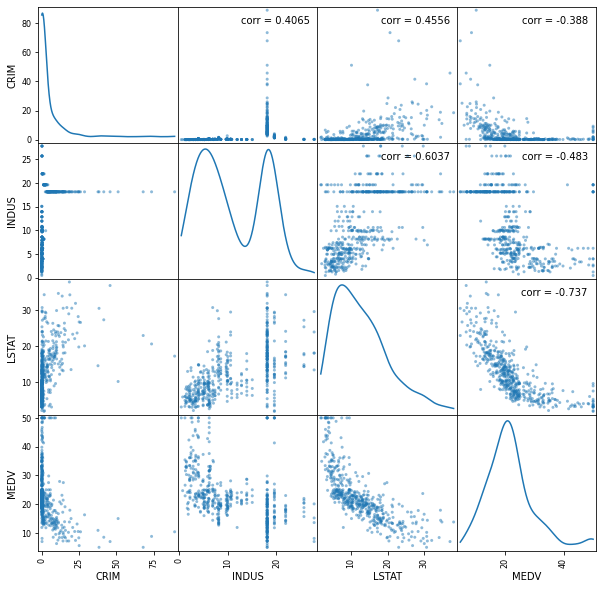

In [14]:
# display scatterplots between the different variables
# the diagonal shows the distribution for each variable

df = housing_df[["CRIM", "INDUS", "LSTAT", "MEDV"]]
axes = scatter_matrix(df, alpha=0.5, figsize=(10, 10),
                      diagonal="kde")

corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("corr = {:.6}".format(str(corr[i,j])), xy=(0.7, 0.9),
                        xycoords="axes fraction", ha="center", va="center")
plt.show()